In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline


In [2]:
#DATA preprocessing
#Load dataset
x_data = pd.read_csv(r'C:\Users\chongs\BDANALYSIS\furnace_bd.csv')
x_data = x_data.iloc[:,2:]
#epoch time 수정
x_data['3'] = x_data['3'].astype(str).str[:-3].astype(np.int64)
x_data['3'] = x_data['3'].astype(str).str[4:].astype(np.int64)

In [3]:
#구간 선택
x_data = x_data[x_data['3'].values > 890472]
x_data = x_data[x_data['3'].values < 901000]

In [4]:
#pivot table 사용 query 진행
x_data = x_data.pivot_table(index = x_data['3'],columns = x_data['1'])
#dataframe 재설정
x_data = x_data['2'][['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16', 'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8', 'temp_zone7_top', 'temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31', 'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37', 'temp_zone8_top']]
x_data = x_data.interpolate()

In [5]:
y_data = pd.read_csv(r"C:\Users\chongs\BDANALYSIS\14_Gls_org.csv", engine = 'python', index_col = False)
#원하는 columns 선택

y_data['time'] = y_data['날짜'] + ' ' + y_data['시간']

#시간 delay 수정 및 epoch 시간으로 convert
total_delay = dt.timedelta(minutes = 8, seconds=5)

y_data['time']=(pd.to_datetime(y_data['time']) + total_delay).apply(dt.datetime.timestamp).astype(np.int64)
y_data['time'] = y_data['time'].astype(str).str[4:].astype(np.int64)

y_data = y_data[['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

y_data.set_index('time', inplace = True)


In [8]:
x_data

1,temp_zone7_10,temp_zone7_12,temp_zone7_14,temp_zone7_16,temp_zone7_4,temp_zone7_6,temp_zone7_8,temp_zone7_top,temp_zone8_25,temp_zone8_27,temp_zone8_29,temp_zone8_31,temp_zone8_33,temp_zone8_35,temp_zone8_37,temp_zone8_top
3,,,,,,,,,,,,,,,,
890473,NaN,706.0,705.000000,710.000000,NaN,NaN,NaN,716.0,719.0,NaN,720.0,NaN,721.0,NaN,NaN,NaN
890474,706.000000,706.0,705.500000,710.000000,NaN,706.000000,706.000000,716.0,719.0,NaN,720.0,NaN,721.0,721.000000,NaN,NaN
890475,706.000000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
890476,706.000000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
890477,706.000000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
890478,705.500000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
890479,705.000000,706.0,705.500000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
890480,705.000000,706.0,705.000000,710.000000,709.0,705.500000,705.500000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
890481,705.000000,706.0,705.000000,710.000000,709.0,705.000000,705.000000,716.0,719.0,719.0,720.0,715.500000,721.0,721.000000,721.0,714.0


In [7]:
x_data.drop()

1,temp_zone7_12,temp_zone7_14,temp_zone7_16,temp_zone7_4,temp_zone7_6,temp_zone7_8,temp_zone7_top,temp_zone8_25,temp_zone8_27,temp_zone8_29,temp_zone8_31,temp_zone8_33,temp_zone8_35,temp_zone8_37,temp_zone8_top
temp_zone7_10,,,,,,,,,,,,,,,
NaN,706.0,705.000000,710.000000,NaN,NaN,NaN,716.0,719.0,NaN,720.0,NaN,721.0,NaN,NaN,NaN
706.000000,706.0,705.500000,710.000000,NaN,706.000000,706.000000,716.0,719.0,NaN,720.0,NaN,721.0,721.000000,NaN,NaN
706.000000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
706.000000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
706.000000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
705.500000,706.0,706.000000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
705.000000,706.0,705.500000,710.000000,709.0,706.000000,706.000000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
705.000000,706.0,705.000000,710.000000,709.0,705.500000,705.500000,716.0,719.0,719.0,720.0,716.000000,721.0,721.000000,721.0,714.0
705.000000,706.0,705.000000,710.000000,709.0,705.000000,705.000000,716.0,719.0,719.0,720.0,715.500000,721.0,721.000000,721.0,714.0


In [6]:
# X, Y data의 index를 y_data의 인덱스에 맞춰 Join 실행(NaN 값 : drop)
xy = pd.concat([x_data, y_data], axis=1, join='inner', join_axes = [x_data.index] )
xy.dropna(inplace=True)

In [7]:
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

In [8]:
# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 10, random_state = 100,max_depth=7, min_impurity_decrease=0.0001))
mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 10, random_state = 100,max_depth=7))
mor.fit(X_train, y_train)

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_test_pred_mor = mor.predict(X_test)

r2_train_mor = r2_score(y_train, y_train_pred_mor)
r2_test_mor = r2_score(y_test, y_test_pred_mor)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_mor, r2_test_mor))

from sklearn import metrics


from sklearn.metrics import explained_variance_score

# print('Explain_variance_score:', explained_variance_score(y_test, y_test_pred_mor))  
print('Explain_variance_score - uniform_average:', explained_variance_score(y_test, y_test_pred_mor,multioutput='uniform_average'))  
# print('Explain_variance_score - multi:', explained_variance_score(y_test, y_test_pred_mor,multioutput='raw_values'))  
print('Explain_variance_score - variance_weighted:', explained_variance_score(y_test, y_test_pred_mor,multioutput='variance_weighted'))  


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_mor))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_mor))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_mor)))  

R2 - Train : 0.962, Test: 0.910
Explain_variance_score - uniform_average: 0.9109754632906883
Explain_variance_score - variance_weighted: 0.9280312851501183
Mean Absolute Error: 0.07489735062332303
Mean Squared Error: 0.011889031602316125


In [10]:
mor.estimators_[1][1]

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=735107864, splitter='best')

In [11]:
X_train.describe()

,temp_zone7_10,temp_zone7_12,temp_zone7_14,temp_zone7_16,temp_zone7_6,temp_zone7_8,temp_zone8_25,temp_zone8_27,temp_zone8_29,temp_zone8_31,temp_zone8_33,temp_zone8_35
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,717.517497,717.509490,718.522242,718.865362,718.517497,718.577106,726.011862,726.037663,724.588671,724.267497,726.238731,726.379300
std,6.594187,6.604426,6.105371,5.615429,6.136821,6.119986,6.734037,6.692583,6.758517,6.868925,6.687971,6.053249
min,704.000000,704.000000,704.000000,706.000000,704.000000,704.000000,714.000000,714.000000,714.333333,714.000000,714.000000,716.000000
25%,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,724.000000,724.500000,716.250000,715.000000,723.125000,724.000000
50%,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,726.000000,726.000000,725.000000,725.000000,727.000000,726.000000
75%,724.875000,724.000000,725.000000,725.000000,725.000000,725.000000,730.000000,730.000000,730.000000,730.000000,731.000000,730.000000
max,726.000000,726.000000,725.333333,726.000000,725.500000,726.000000,736.333333,736.000000,737.000000,736.000000,737.000000,736.000000


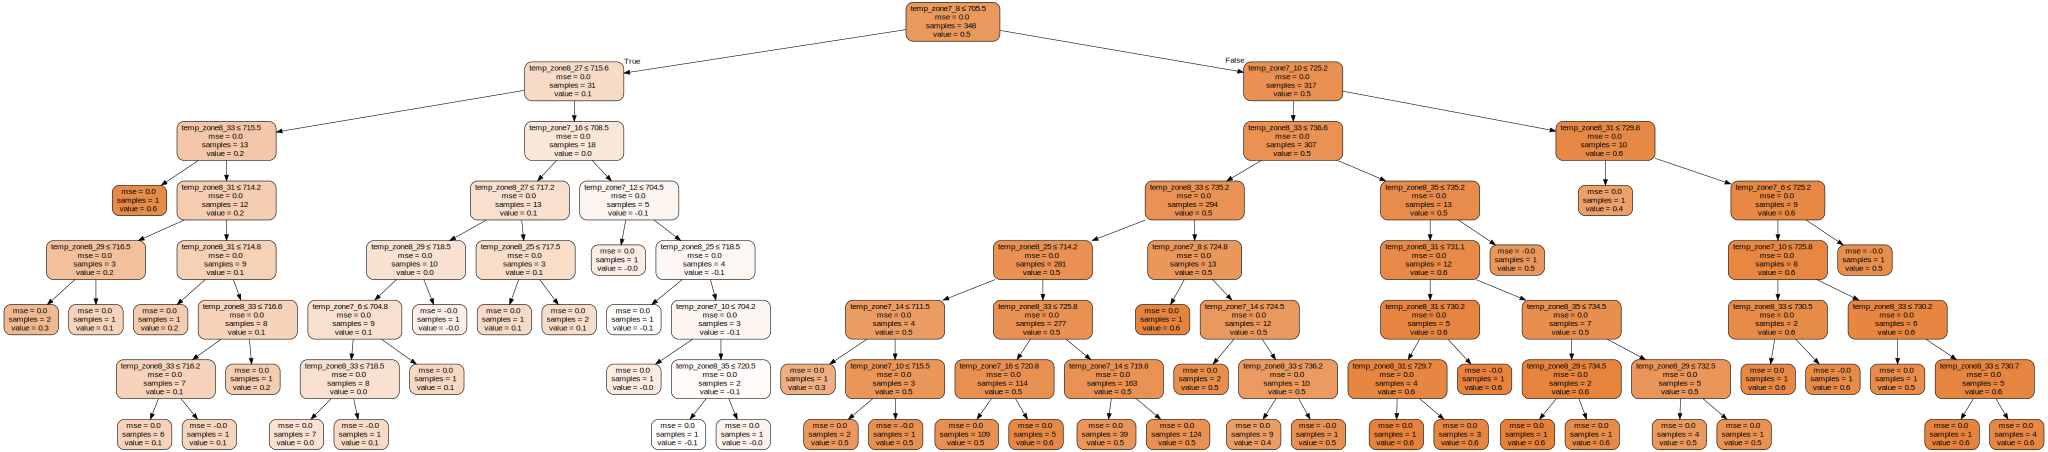

In [12]:
from sklearn import tree
import graphviz 
estimator = mor.estimators_[1][1]
dot_data = tree.export_graphviz(estimator, out_file=None) 
graph = graphviz.Source(dot_data)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

dot_data = tree.export_graphviz(estimator, out_file=None, 
                         feature_names=np.array(X_train.columns),  
                         class_names=np.array(y_train.columns),  
                         filled=True, rounded=True,  
                         special_characters=True, precision = 1)  

graph = graphviz.Source(dot_data)  
graph.render('tree2')
graph

In [13]:
#sk learn 랜덤포레스트 리그레션 피팅 X by each Y (X/Y)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

result_r2 = []
# for i in X_train.columns:
#     X_sample_train = X_train[i].values.reshape(-1,1)
#     X_sample_test = X_test[i].values.reshape(-1,1)
  
for j in y_train.columns:
    y_sample_train = y_train[j].values.reshape(-1,1)
    y_sample_test = y_test[j].values.reshape(-1,1)

    regressor = RandomForestRegressor(n_estimators = 84, random_state = 100, max_depth = 7)
    regressor.fit(X_train,y_sample_train)

    #결정계수 r2 score 계산

    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    r2_train = r2_score(y_sample_train, y_train_pred)
    r2_test = r2_score(y_sample_test, y_test_pred)

    print('R2 - Train : %.3f, Test: %.3f' %(r2_train, r2_test))

    result_r2.append((j,r2_train,r2_test))
    
result_r2 = pd.DataFrame(result_r2)
#         print('Mean Absolute Error:', metrics.mean_absolute_error(y_sample_test, y_test_pred))  
#         print('Mean Squared Error:', metrics.mean_squared_error(y_sample_test, y_test_pred))  
#         print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_sample_test, y_test_pred))) 

C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.979, Test: 0.930


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.872, Test: 0.700


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.959, Test: 0.881


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.981, Test: 0.942


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.974, Test: 0.928


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.977, Test: 0.925
R2 - Train : 0.960, Test: 0.907


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.974, Test: 0.920


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.981, Test: 0.941


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.976, Test: 0.924


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.978, Test: 0.931


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.967, Test: 0.906


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.967, Test: 0.853


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.970, Test: 0.926


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


R2 - Train : 0.949, Test: 0.842


In [12]:
result_r2

,0,1,2
0,A,0.978973,0.929574
1,B,0.871711,0.699696
2,C,0.959008,0.881197
3,D,0.980604,0.942181
4,E,0.974215,0.927766
5,F,0.976789,0.924918
6,G,0.960114,0.907059
7,H,0.974375,0.920171
8,I,0.980603,0.941252
9,J,0.975973,0.924488


In [13]:
#sk learn 랜덤포레스트 리그레션 피팅 each X by all Y (X/Y)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

result_r3 = []
for i in X_train.columns:
    X_sample_train = X_train[i].values.reshape(-1,1)
    X_sample_test = X_test[i].values.reshape(-1,1)
  
    regressor = RandomForestRegressor(n_estimators = 84, random_state = 100, max_depth = 7)
    regressor.fit(X_sample_train,y_train)

    #결정계수 r2 score 계산

    y_train_pred = regressor.predict(X_sample_train)
    y_test_pred = regressor.predict(X_sample_test)

    r3_train = r2_score(y_train, y_train_pred)
    r3_test = r2_score(y_test, y_test_pred)

    print('R3 - Train : %.3f, Test: %.3f' %(r3_train, r3_test))

    result_r3.append((i,r3_train,r3_test))
    
result_r3 = pd.DataFrame(result_r3)


#         print('Mean Absolute Error:', metrics.mean_absolute_error(y_sample_test, y_test_pred))  
#         print('Mean Squared Error:', metrics.mean_squared_error(y_sample_test, y_test_pred))  
#         print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_sample_test, y_test_pred))) 

R3 - Train : 0.773, Test: 0.715
R3 - Train : 0.788, Test: 0.779
R3 - Train : 0.897, Test: 0.815
R3 - Train : 0.863, Test: 0.814
R3 - Train : 0.907, Test: 0.823
R3 - Train : 0.903, Test: 0.815
R3 - Train : 0.760, Test: 0.639
R3 - Train : 0.775, Test: 0.699
R3 - Train : 0.786, Test: 0.717
R3 - Train : 0.632, Test: 0.606
R3 - Train : 0.785, Test: 0.494
R3 - Train : 0.836, Test: 0.756


In [14]:
result_r3

,0,1,2
0,temp_zone7_10,0.772942,0.715382
1,temp_zone7_12,0.787751,0.779454
2,temp_zone7_14,0.896743,0.815429
3,temp_zone7_16,0.863234,0.813812
4,temp_zone7_6,0.906758,0.823018
5,temp_zone7_8,0.903082,0.815223
6,temp_zone8_25,0.760408,0.639158
7,temp_zone8_27,0.774715,0.698724
8,temp_zone8_29,0.785877,0.716651
9,temp_zone8_31,0.631990,0.606385


In [15]:
# MultiOutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor


estimators = np.arange(1, 100, 2)
scores = []
for n in gamma:
       
    regressor = RandomForestRegressor(n_estimators = 93, random_state = 100,max_depth=None)
    regressor.fit(X_train, y_train)

    
    scores.append(regressor.score(X_test, y_test))

plt.title("Effect of gamma")
plt.xlabel("gamma")
plt.ylabel("score")
plt.plot(gamma, scores)
print('maximum score : ', np.max(scores))
print('max scored gamma : ', gamma[np.where(scores == np.max(scores))])
#degree : 2 에서 최적의 score를 얻을 수있다.

NameError: name 'gamma' is not defined

maximum score :  0.9215419777365546
max scored n_estimators :  [3]


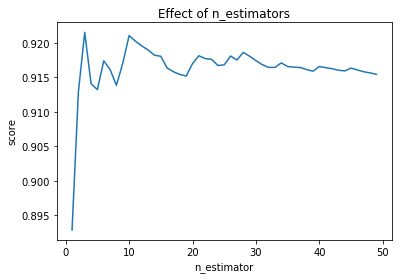

In [15]:
# Try different numbers of n_estimators 

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 93, random_state = 100,max_depth=None)
regressor.fit(X_train, y_train)


estimators = np.arange(1, 50, 1)
scores = []
for n in estimators:
    regressor.set_params(n_estimators = n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
print('maximum score : ', np.max(scores))
print('max scored n_estimators : ', estimators[np.where(scores == np.max(scores))])
#3개의 Tree에서 최적의 score를 얻을 수있다.

In [32]:
np.array(y_train.columns)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [33]:
regressor.estimators_[1]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=735107864, splitter='best')

In [41]:

estimator = regressor.estimators_[1]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = np.array(X_train.columns),
                class_names = np.array(y_train.columns),
                rounded = True, proportion = False, 
                filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [47]:
from sklearn import tree
import graphviz 
estimator = regressor.estimators_[1]
dot_data = tree.export_graphviz(estimator, out_file='tree.dot') 
graph = graphviz.Source(dot_data)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

dot_data = tree.export_graphviz(estimator, out_file=None, 
                         feature_names=np.array(X_train.columns),  
                         class_names=np.array(y_train.columns),  
                         filled=True, rounded=True,  
                         special_characters=True, precision = 1)  

graph = graphviz.Source(dot_data)  
graph.render('tree1')
graph

3221225477

maximum score :  0.9297811007649242
max scored depth :  [7]


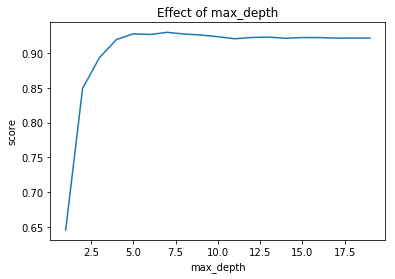

In [17]:
# Try different numbers of max_depth
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 3, random_state = 100,max_depth=7)
regressor.fit(X_train, y_train)

depths = np.arange(1, 20, 1)
scores = []
for n in depths:
    regressor.set_params(max_depth = n)
    regressor.fit(X_train, y_train)
    scores.append(regressor.score(X_test, y_test))
plt.title("Effect of max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(depths, scores)
print('maximum score : ', np.max(scores))
print('max scored depth : ', depths[np.where(scores == np.max(scores))])
#7의 Depth에서 최적의 score를 얻을 수있다.

In [18]:
# variable inportance
#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[[ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','O']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

#sk learn 랜덤포레스트 리그레션 피팅
from tabulate import tabulate

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 107, random_state = 100, max_depth = 7)
model = regressor.fit(X_train,y_train)

headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="simple"))

name                score
-------------  ----------
temp_zone7_6   0.33087
temp_zone7_8   0.313882
temp_zone7_14  0.209989
temp_zone8_31  0.0608108
temp_zone7_16  0.0242723
temp_zone8_33  0.0152831
temp_zone8_35  0.0138401
temp_zone7_12  0.0100925
temp_zone8_27  0.00855504
temp_zone8_25  0.00628861
temp_zone8_29  0.00436965
temp_zone7_10  0.00174618


C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\chongs\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


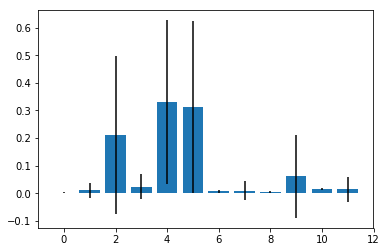

In [19]:
importance = model.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in model.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

In [20]:
importance

,Importance,Std
temp_zone7_10,0.001746,0.001232
temp_zone7_12,0.010093,0.027989
temp_zone7_14,0.209989,0.285658
temp_zone7_16,0.024272,0.045449
temp_zone7_6,0.330870,0.295835
temp_zone7_8,0.313882,0.311309
temp_zone8_25,0.006289,0.004463
temp_zone8_27,0.008555,0.034047
temp_zone8_29,0.004370,0.002830
temp_zone8_31,0.060811,0.150228


In [22]:
# 705~735 size nx12의 난수 생성
X_grid = np.random.randint(705, 735, size=(1000,12))

# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 8, random_state = 93,max_depth=3))
mor.fit(X_train, y_train)

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_gird_pred_mor = mor.predict(X_grid)

#MSE를 통한 최적조건
result = []

for i in range(len(X_grid)):
   
    mean = np.mean(y_gird_pred_mor[i])
    sqrerr = np.asarray(mean - y_gird_pred_mor[i])**2
    cost = (1/2)*np.sum(sqrerr)
    result = np.append(result, cost)

print(np.where(result == np.min(result)))
print(result[np.where(result == np.min(result))])
print(X_test.iloc[result[np.where(result == np.min(result))],:])
print('std : ',np.std(y_gird_pred_mor[np.where(result == np.min(result))]))
print('min : ',np.min(y_gird_pred_mor[np.where(result == np.min(result))]))
print('max : ',np.max(y_gird_pred_mor[np.where(result == np.min(result))]))
print('mean : ',np.mean(y_gird_pred_mor[np.where(result == np.min(result))]))
print('Y : ',y_gird_pred_mor[np.where(result == np.min(result))])

(array([302], dtype=int64),)
[0.20121121]
        temp_zone7_10  temp_zone7_12  temp_zone7_14  temp_zone7_16  \
3                                                                    
895086          715.0          715.0          720.0          720.5   

        temp_zone7_6  temp_zone7_8  temp_zone8_25  temp_zone8_27  \
3                                                                  
895086         720.0         720.0          725.0          725.0   

        temp_zone8_29  temp_zone8_31  temp_zone8_33  temp_zone8_35  
3                                                                   
895086          724.0          725.0          725.0          725.0  
std :  0.16379304322848973
min :  0.22218384378581973
max :  0.8287217500152297
mean :  0.4754816645668806
Y :  [[0.52461347 0.23118441 0.63223873 0.5379143  0.82872175 0.5929148
  0.64396312 0.35288256 0.22218384 0.53156811 0.35652384 0.52538714
  0.49690227 0.29815876 0.35706786]]


In [23]:
# 705~735 size nx12의 난수 생성
X_grid = np.random.randint(705, 735, size=(1000,12))

# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 8, random_state = 93,max_depth=3))
mor.fit(X_train, y_train)

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_gird_pred_mor = mor.predict(X_grid)


#Mean를 통한 최적조건
result2 = []
for i in range(len(X_test)):
    mean = np.mean(y_gird_pred_mor[i])
    
    result2 = np.append(result2, mean)

print(np.where(result2 == np.min(result2)))
print(result[np.where(result2 == np.min(result2))])
print(X_test.iloc[result[np.where(result2 == np.min(result2))],:])
print('std : ',np.std(y_gird_pred_mor[np.where(result2 == np.min(result2))]))
print('min : ',np.min(y_gird_pred_mor[np.where(result2 == np.min(result2))]))
print('max : ',np.max(y_gird_pred_mor[np.where(result2 == np.min(result2))]))
print('mean : ',np.mean(y_gird_pred_mor[np.where(result2 == np.min(result2))]))
print('Y : ',y_gird_pred_mor[np.where(result2 == np.min(result2))])

(array([178], dtype=int64),)
[1.0431436]
        temp_zone7_10  temp_zone7_12  temp_zone7_14  temp_zone7_16  \
3                                                                    
891985          705.0          705.0          715.0          716.0   

        temp_zone7_6  temp_zone7_8  temp_zone8_25  temp_zone8_27  \
3                                                                  
891985         715.0         716.0          715.0          715.0   

        temp_zone8_29  temp_zone8_31  temp_zone8_33  temp_zone8_35  
3                                                                   
891985          715.0          715.0          715.0          716.5  
std :  0.2065112374098884
min :  0.09973720397249808
max :  0.7251192190841983
mean :  0.36126356784024727
Y :  [[0.49390489 0.26859421 0.45263027 0.5396163  0.72511922 0.54084796
  0.72419123 0.25159287 0.2067446  0.13251863 0.14788788 0.46824871
  0.17098669 0.19633285 0.0997372 ]]


In [29]:
# 705~735 size nx12의 난수 생성
X_grid = np.random.randint(705, 735, size=(1000,12))

# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 8, random_state = 93,max_depth=3))
mor.fit(X_train, y_train)

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_gird_pred_mor = mor.predict(X_grid)



#Max를 통한 최적조건
result3 = []
for i in range(len(X_test)):
    pred_max = np.max(np.abs(y_test_pred_mor[i]))
    
    result3 = np.append(result3, pred_max)

print(np.where(result3 == np.min(result3)))
print(result[np.where(result3 == np.min(result3))])
print(X_test.iloc[result[np.where(result3 == np.min(result3))],:])
print('std : ',np.std(y_gird_pred_mor[np.where(result3 == np.min(result3))]))
print('min : ',np.min(y_gird_pred_mor[np.where(result3 == np.min(result3))]))
print('max : ',np.max(y_gird_pred_mor[np.where(result3 == np.min(result3))]))
print('mean : ',np.mean(y_gird_pred_mor[np.where(result3 == np.min(result3))]))
print('Y : ',y_gird_pred_mor[np.where(result3 == np.min(result3))])

(array([18], dtype=int64),)
[1.03137776]
        temp_zone7_10  temp_zone7_12  temp_zone7_14  temp_zone7_16  \
3                                                                    
891985          705.0          705.0          715.0          716.0   

        temp_zone7_6  temp_zone7_8  temp_zone8_25  temp_zone8_27  \
3                                                                  
891985         715.0         716.0          715.0          715.0   

        temp_zone8_29  temp_zone8_31  temp_zone8_33  temp_zone8_35  
3                                                                   
891985          715.0          715.0          715.0          716.5  
std :  0.324582378100762
min :  0.525465260010584
max :  1.5469626815549766
mean :  1.069353888385621
Y :  [[0.78092286 0.52546526 1.26129599 1.1337368  1.54696268 1.50486988
  0.75451327 1.41561527 0.74059511 1.34865939 1.34298111 1.24746422
  0.89350122 0.87884484 0.66488043]]


In [25]:
# #Random Forestclassifier https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

# #x,y값 재추출
# x_cf = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
#        'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
#        'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37']]
# y_cf = xy[['E']]

# # Train / Test set 나누기
# from sklearn.cross_validation import train_test_split
# X_cf_train, X_cf_test, y_cf_train, y_cf_test = train_test_split(x_cf, y_cf, test_size=0.33, random_state=100)

# from sklearn.ensemble import RandomForestClassifier

# rfc=RandomForestClassifier(n_estimators=600)

# rfc.fit(X_cf_train,y_cf_train)
# rfc_pred = rfc.predict(X_cf_test)
# from  sklearn.metrics import classification_report,confusion_matrix
# prediction = regressor.predict(X_cf_test)
# classification_report(y_cf_test,prediction)

In [26]:
# y_test와 y_test_pred(예측값) 비교
error = np.abs(y_test - y_test_pred_mor)
summary = error.describe()

In [27]:
summary

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,0.063109,0.044486,0.078010,0.054087,0.112071,0.100124,0.093411,0.113548,0.057957,0.083236,0.089013,0.075734,0.052905,0.056960,0.048809
std,0.066509,0.041323,0.083644,0.054304,0.105169,0.094181,0.077034,0.106364,0.053565,0.084179,0.088093,0.075309,0.065224,0.063534,0.046566
min,0.000135,0.000412,0.000206,0.000328,0.001389,0.000592,0.000006,0.000606,0.000092,0.000227,0.000107,0.000200,0.000252,0.000608,0.000166
25%,0.023230,0.015919,0.021649,0.019559,0.047266,0.037169,0.036506,0.038359,0.021628,0.034779,0.030173,0.027679,0.015607,0.019638,0.022494
50%,0.044233,0.034389,0.055030,0.038102,0.086432,0.078656,0.072562,0.082748,0.042760,0.065624,0.067470,0.058671,0.036840,0.039038,0.040353
75%,0.080374,0.064945,0.110031,0.071357,0.146102,0.131211,0.133959,0.149417,0.078295,0.096967,0.119762,0.096471,0.072390,0.068927,0.061716
max,0.584929,0.421587,0.660375,0.401542,0.750556,0.658736,0.347122,0.721319,0.375939,0.715878,0.585673,0.544400,0.595056,0.449293,0.511524


In [28]:
#error의 평균 및 std값 visualization
#Plotly PLot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

x = summary.columns
y = summary.iloc[1,:]

c = summary.iloc[2,:]
# s = xy['E']  + 2 
data=[
    go.Scatter(x=x,y=y,
                mode = 'markers',
                marker = dict(
                size = 10,
                color= c,
                showscale=True
                ),
                )
]
layout=go.Layout()
figure=go.Figure(data=data,layout=layout)
py.iplot(figure)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)


# MultiOutput regressor
#Fitting Linear Regression to the Training set
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

lin_regressor = MultiOutputRegressor(LinearRegression())
lin_regressor.fit(X_train, y_train)




MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
           n_jobs=1)

In [29]:
#Predicting the Test set results
y_prediction = lin_regressor.predict(X_test)

In [ ]:
#결정계수 r2 score 계산
from sklearn.metrics import r2_score
y__trainlinear_pred = lin_regressor.predict(X_train)
y_linear_pred = lin_regressor.predict(X_test)

r2_train = r2_score(y_train, y__trainlinear_pred)
r2_test = r2_score(y_test, y_linear_pred)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train, r2_test))

In [ ]:
x

In [ ]:
#Building the optinal model using Backward Elimination
#OLS = Ordinary least squares
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[[ 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','O']]

import statsmodels.formula.api as sm
from sklearn.multioutput import MultiOutputRegressor

# regressor_OLS = MultiOutputRegressor(RandomForestRegressor(n_estimators = 84, random_state = 100,max_depth=8))

X = np.append(arr = np.ones((989, 1)).astype(int), values = x, axis =1)
# X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()